# Projeto 5 - Pedro de la Peña

# Pergunta: Como a renda e a mortalidade infantil influenciam na expectativa de vida?

# 1º Etapa

Para a primeira etapa, foi utilizado o site http://www.gapminder.org/tools/ para obter gráficos de duas variáveis que aparentavam ter algum tipo de correlação. Desta forma, foi escolhida como variável resposta a <strong>expectativa de vida</strong> da população dos países e como variáveis explicativas foram escolhidas a <strong>renda calculada por PIB/capita</strong> e <strong>mortalidade infantil</strong>. Vale a pena lembrar que todas as variáveis tem base no ano de 2015.

Desta forma, foram obtidos os seguintes gráficos:

### Expectativa de vida por renda (PIB/capita)

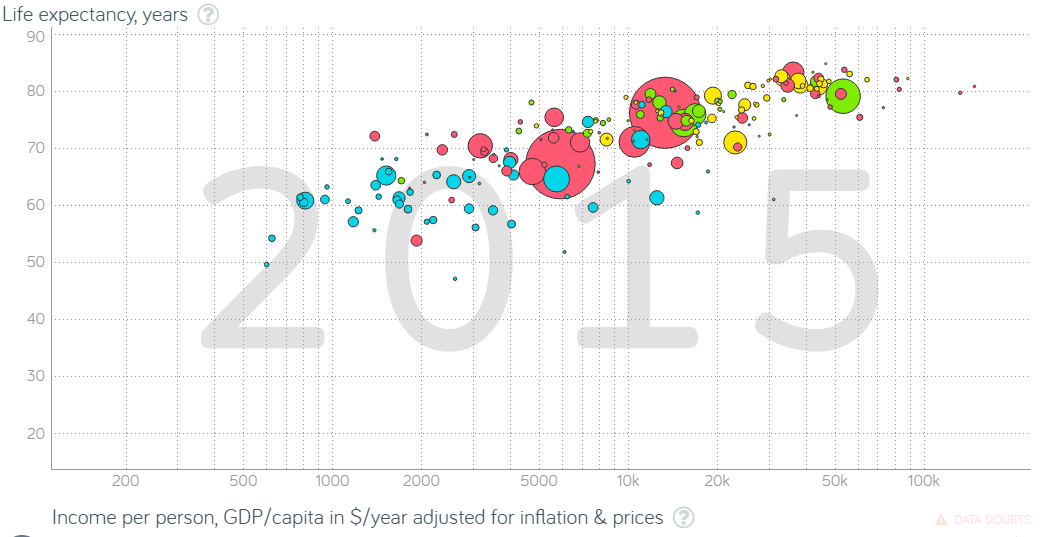

In [15]:
from IPython.display import Image
Image(filename='expectativa_por_renda.png')

### Expectativa de vida por Mortalidade infantil

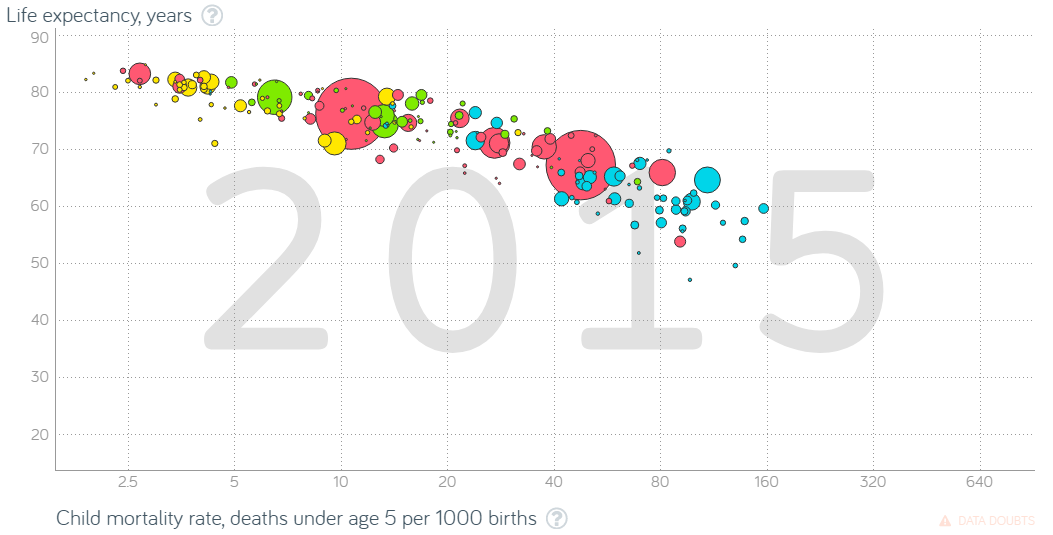

In [16]:
Image(filename='expectativa_por_mortinf.png')

# Construção do banco de dados.

In [31]:
import pandas as pd
import os
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Desktop\Projeto 5


In [32]:
dadosfull = pd.read_excel("variaveisp5.xlsx")

In [33]:
dadosfull.dropna()

,Pais,Expectativa,Renda,Mortalidade
1,Afghanistan,53.80,1925.0,91.10
3,Albania,78.00,10620.0,14.00
4,Algeria,76.40,13434.0,24.00
6,Andorra,84.80,46577.0,2.80
7,Angola,59.60,7615.0,156.90
9,Antigua and Barbuda,76.40,21049.0,8.10
10,Argentina,76.50,17344.0,12.50
11,Armenia,74.70,7763.0,14.20
12,Aruba,75.72,37138.0,16.57
13,Australia,82.30,44056.0,3.50


In [34]:
dados = dadosfull[(dadosfull.Expectativa > 0) & (dadosfull.Renda > 0) & (dadosfull.Mortalidade > 0)  ]
dados

,Pais,Expectativa,Renda,Mortalidade
1,Afghanistan,53.80,1925.0,91.10
3,Albania,78.00,10620.0,14.00
4,Algeria,76.40,13434.0,24.00
6,Andorra,84.80,46577.0,2.80
7,Angola,59.60,7615.0,156.90
9,Antigua and Barbuda,76.40,21049.0,8.10
10,Argentina,76.50,17344.0,12.50
11,Armenia,74.70,7763.0,14.20
12,Aruba,75.72,37138.0,16.57
13,Australia,82.30,44056.0,3.50


### Adicionando colunas de log mortalidade e renda

In [35]:
dados['LogRenda'] = np.log(dados.Renda)
dados['LogMort'] = np.log(dados.Mortalidade)
dados

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Pais,Expectativa,Renda,Mortalidade,LogRenda,LogMort
1,Afghanistan,53.80,1925.0,91.10,7.562681,4.511958
3,Albania,78.00,10620.0,14.00,9.270494,2.639057
4,Algeria,76.40,13434.0,24.00,9.505544,3.178054
6,Andorra,84.80,46577.0,2.80,10.748862,1.029619
7,Angola,59.60,7615.0,156.90,8.937875,5.055609
9,Antigua and Barbuda,76.40,21049.0,8.10,9.954608,2.091864
10,Argentina,76.50,17344.0,12.50,9.761002,2.525729
11,Armenia,74.70,7763.0,14.20,8.957124,2.653242
12,Aruba,75.72,37138.0,16.57,10.522396,2.807594
13,Australia,82.30,44056.0,3.50,10.693217,1.252763


# 2ª Etapa - Teórica - Disponível no repositório

# 3ª Etapa:

### Nesta etapa, serão analisados com maior profundidade os dados obtidos na primeira etapa, que contou apenas com uma análise superficial.

# Análise Descritiva

#### Correlação Expectativa de vida por Renda

[[ 1.          0.80374778]
 [ 0.80374778  1.        ]]


<IPython.core.display.Javascript object>


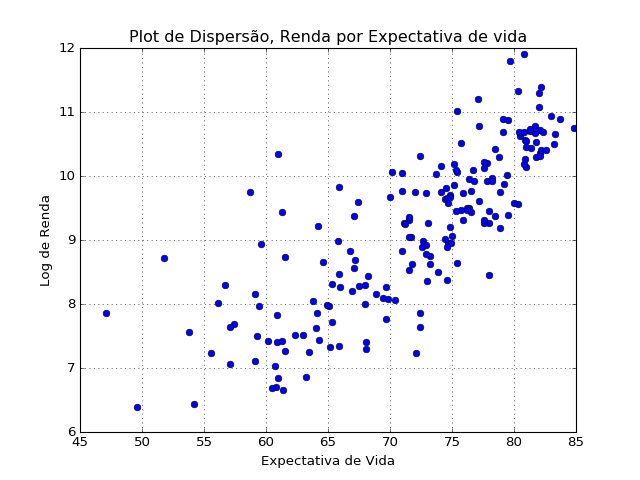

In [6]:
print(np.corrcoef(np.log(dados.Renda),dados.Expectativa))
plt.plot(dados.Expectativa,np.log(dados.Renda),'bo')
plt.title("Plot de Dispersão, Renda por Expectativa de vida")
correlação_com_renda = np.corrcoef(np.log(dados.Renda),dados.Expectativa)
plt.ylabel("Log de Renda")
plt.xlabel("Expectativa de Vida")
plt.grid()
plt.show()

#### Correlação Expectativa de vida por Mortalidade infantil

[[ 1.        -0.8937453]
 [-0.8937453  1.       ]]


<IPython.core.display.Javascript object>


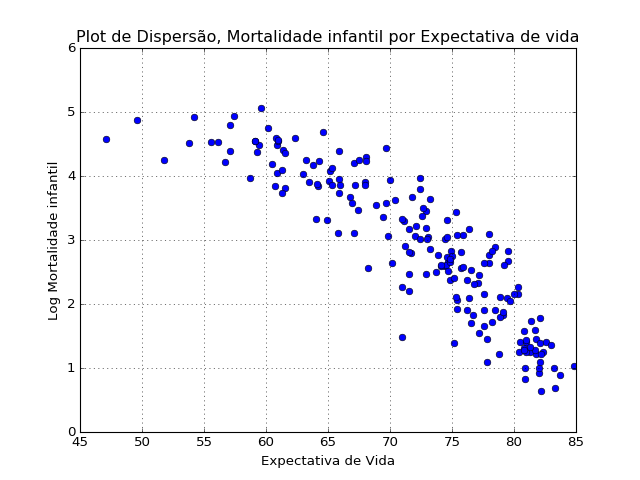

In [7]:
print(np.corrcoef(np.log(dados.Mortalidade),dados.Expectativa))
plt.plot(dados.Expectativa,np.log(dados.Mortalidade),'bo')
plt.title("Plot de Dispersão, Mortalidade infantil por Expectativa de vida")
correlação_com_mortalidade = np.corrcoef(np.log(dados.Mortalidade),dados.Expectativa)
plt.ylabel("Log Mortalidade infantil")
plt.xlabel("Expectativa de Vida")
plt.grid()
plt.show()


In [8]:
Variáveis = ["PIB per capita","Mortalidade infantil"]
Correlação = [correlação_com_renda[1][0],correlação_com_mortalidade[1][0]]
corr_data = pd.DataFrame()
corr_data["Variáveis"] = Variáveis
corr_data["Correlação com a Expectativa de vida"] = Correlação
corr_data

,Variáveis,Correlação com a Expectativa de vida
0,PIB per capita,0.803748
1,Mortalidade infantil,-0.893745


Com o auxílio desta tabela, é possivel confirmar a correlação entre as variáveis explicativas e a variável resposta, uma vez que os valores dos coeficientes estão bem distantes de 0 e próximos a 1 ou -1.

# Análise de Regressão Múltipla

<IPython.core.display.Javascript object>


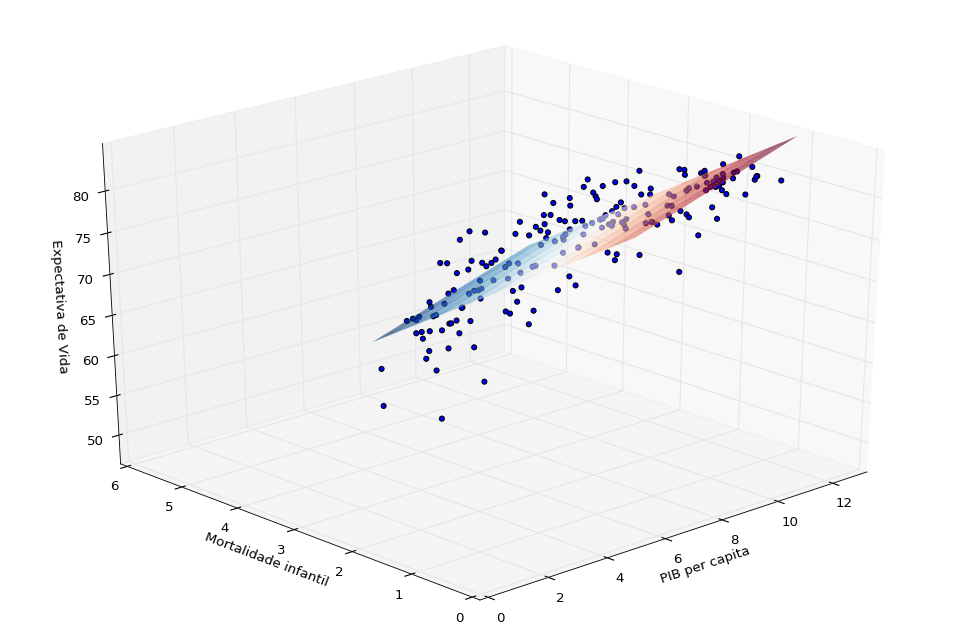

(47.100000000000001, 84.799999999999997)

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm  #Usa OLS como no R
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

X = dados[["LogRenda","LogMort"]]
y = dados.Expectativa

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.LogRenda.min(), X.LogRenda.max(), 100), 
                       np.linspace(X.LogMort.min(), X.LogMort.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].LogRenda, X[resid >= 0].LogMort, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].LogRenda, X[resid < 0].LogMort, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('PIB per capita')
ax.set_ylabel('Mortalidade infantil')
ax.set_zlabel('Expectativa de Vida')
ax.set_xlim3d(0,)
ax.set_ylim3d(0,)
ax.set_zlim3d(dados.Expectativa.min(),dados.Expectativa.max())

In [19]:
y=np.log(dados.Expectativa)
X=dados[["LogRenda","LogMort"]]
X=sm.add_constant(X)  
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Expectativa   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     330.7
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           2.71e-62
Time:                        18:54:01   Log-Likelihood:                 282.50
No. Observations:                 191   AIC:                            -559.0
Df Residuals:                     188   BIC:                            -549.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.3250      0.072     60.467      0.000         4.184     4.466
LogRenda       0.0174      0.006      2.907      0.004         0.006     0.029
LogMort       -0.0746      0.006    -11.545      0.000        -0.087    -0.062
==============================================================================
Omnibus:                       46.116   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.839
Skew:                          -1.017   Prob(JB):                     3.49e-27
Kurtosis:                       6.342   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*<strong>Variável resposta</strong>* = Expectativa de vida (EXPV) 

*<strong>Variáveis Explicativas</strong>* = Renda (REN) e Mortalidade Infantil (MI) 


#### EXPV = 4.3250 + 0.0174REN + -0.0746MI

Para verificar se as variáveis são relevantes ao modelo, será feito um teste de hipótese, sendo a hipótese nula e alternativa as seguintes:

                                          H0: β = 0

                                          H1: β ̂≠ 0

O valor P para ambas variáveis explicativas é muito próximo de 0, e portanto há grandes chances de se rejeitar a hipótese nula, tornando-as variáveis relevantes para o modelo.

## Análise de Resíduos

### Resíduos para renda

<IPython.core.display.Javascript object>


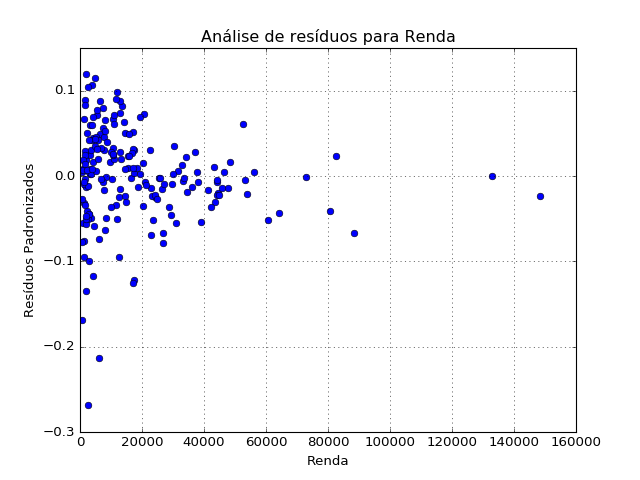

In [12]:
plt.plot(dados.Renda, fit.resid, 'o')
plt.title('Análise de resíduos para Renda')
plt.ylabel('Resíduos Padronizados')
plt.xlabel('Renda')
plt.grid()
plt.show()

### Resíduos para mortalidade infantil

<IPython.core.display.Javascript object>


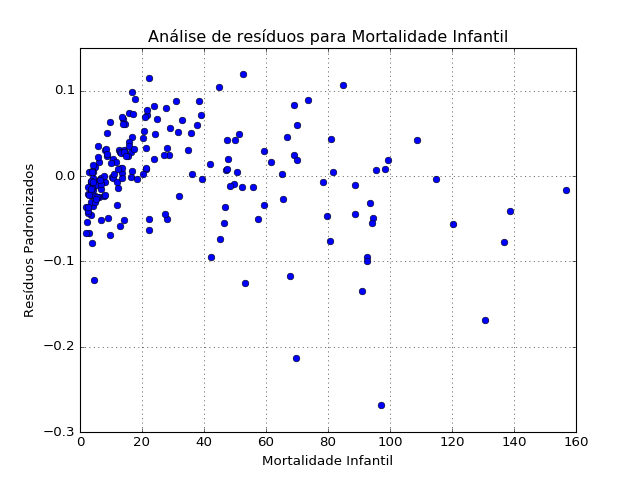

In [13]:
plt.plot(dados.Mortalidade, fit.resid, 'o')
plt.title('Análise de resíduos para Mortalidade Infantil')
plt.ylabel('Resíduos Padronizados')
plt.xlabel('Mortalidade Infantil')
plt.grid()
plt.show()

Os resíduos para ambas variáveis estão concentrando em torno de zero, comportando-se da maneira esperada.

## Interpretação dos Parâmetros

B1 e B2 são parâmetros que indicam a relação da variável resposta quando as variáveis explicativas são alteradas. 

Para um aumento de 10% na renda, haverá o aumento aproximado de 1,7 anos na expectativa de vida, enquanto para o aumento de 10% na mortalidade infantil há redução de aproximadamente 7 anos na expectativa de vida.

## Objetivos

O objetivo principal do projeto é analisar como a expectativa de vida está ligada à renda (PIB/capita) e mortalidade infantil. Recorrendo aos conceitos estudados durante o curso para obter os parâmetros parâmetros que comprovam as primeiras suspeitas da etapa 1, temos:

O R² indica o quão bem os valores se ajustam ao modelo, variando entre 0 e 1, sendo que quanto mais perto de um melhor o modelo. O R² obtido foi de : 0.779. Um valor que comprova que o modelo é relativamente bom, porém não excepcional.


# Avaliação do modelo de regressão multipla para diferentes faixas de Renda.

In [43]:
muito_elevado = dados[(dadosfull.Renda >= 30000)]
elevado = dados[(dadosfull.Renda >= 20000)& (dadosfull.Renda < 29999)]
médio = dados[(dadosfull.Renda >= 10000) & (dadosfull.Renda < 19999)]
baixo  = dados[(dadosfull.Renda <10000)]

C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## Analisando idh muito elevado

In [44]:
y=np.log(muito_elevado.Expectativa)
X=muito_elevado[["Renda","Mortalidade"]]
X=sm.add_constant(X)  
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Expectativa   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           1.45e-15
Time:                        19:29:19   Log-Likelihood:                 95.677
No. Observations:                  39   AIC:                            -185.4
Df Residuals:                      36   BIC:                            -180.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.4124      0.008    527.537      0.000         4.395     4.429
Renda       -4.854e-08   1.39e-07     -0.350      0.728      -3.3e-07  2.32e-07
Mortalidade    -0.0034      0.000    -14.210      0.000        -0.004    -0.003
==============================================================================
Omnibus:                       12.899   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.401
Skew:                          -1.157   Prob(JB):                      0.00123
Kurtosis:                       4.701   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analisando idh elevado

In [45]:
y=np.log(elevado.Expectativa)
X=elevado[["Renda","Mortalidade"]]
X=sm.add_constant(X)  
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Expectativa   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     5.760
Date:                Thu, 01 Jun 2017   Prob (F-statistic):             0.0111
Time:                        19:29:20   Log-Likelihood:                 45.398
No. Observations:                  22   AIC:                            -84.80
Df Residuals:                      19   BIC:                            -81.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.3797      0.083     52.714      0.000         4.206     4.554
Renda        3.007e-07   2.99e-06      0.101      0.921     -5.95e-06  6.55e-06
Mortalidade    -0.0060      0.002     -2.769      0.012        -0.010    -0.001
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.166
Skew:                           0.056   Prob(JB):                        0.920
Kurtosis:                       3.410   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analisando idh médio

In [46]:
y=np.log(médio.Expectativa)
X=médio[["Renda","Mortalidade"]]
X=sm.add_constant(X)  
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Expectativa   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     31.41
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           6.30e-09
Time:                        19:29:20   Log-Likelihood:                 74.612
No. Observations:                  43   AIC:                            -143.2
Df Residuals:                      40   BIC:                            -137.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.3895      0.037    118.570      0.000         4.315     4.464
Renda       -6.064e-07   2.46e-06     -0.247      0.806     -5.57e-06  4.36e-06
Mortalidade    -0.0042      0.001     -7.923      0.000        -0.005    -0.003
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.951
Skew:                          -0.356   Prob(JB):                        0.621
Kurtosis:                       2.845   Cond. No.                     7.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analisando idh baixo

In [47]:
y=np.log(baixo.Expectativa)
X=baixo[["Renda","Mortalidade"]]
X=sm.add_constant(X)  
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Expectativa   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     81.52
Date:                Thu, 01 Jun 2017   Prob (F-statistic):           2.11e-20
Time:                        19:29:22   Log-Likelihood:                 119.50
No. Observations:                  87   AIC:                            -233.0
Df Residuals:                      84   BIC:                            -225.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.2634      0.024    181.379      0.000         4.217     4.310
Renda        9.074e-06   3.22e-06      2.821      0.006      2.68e-06  1.55e-05
Mortalidade    -0.0021      0.000     -8.888      0.000        -0.003    -0.002
==============================================================================
Omnibus:                       26.721   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.133
Skew:                          -1.171   Prob(JB):                     1.30e-11
Kurtosis:                       5.888   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analisando-se o R² para subgrupos pode-se percebr que o modelo que era muito bom quando observado de maneira global. A relação das variáveis explicativas com a resposta não se manteve bom para "fenômenos" locais, um vez que o parâmetro R² se mostrou baixo para as 2 das subdivisões escolhidas (0.61 e 0.66), muito baixo para uma (0.377) e uma alta (0.85).

# Conclusão

Retomando a pergunta inicial:

<strong>Como a renda e a mortalidade infantil influenciam na expectativa de vida?</strong>
    
O modelo encontrado deixou claro que o aumento da renda(PIB/capita) leva ao aumento da expectativa de vida enquanto o aumento da mortalidade infantil causa redução na variável resposta. Logo, pode-se concluir que o modelo é bom, visto que R² vale 0.779, fortalecendo a qualidade do modelo. Além disso, os resíduos se comportaram de maneira esperada.